In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## 1. Data

In [4]:
# Buat dataset 2D
X = np.array([[2, 3], [3, 3], [3, 4], [5, 6], [6, 5], [7, 8]])
y = np.array([0, 0, 0, 1, 1, 1])  # 0 = kelas merah, 1 = kelas biru

## 2. Model SVM-Linier

In [6]:
# Buat model SVM linear
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
# Ambil koefisien hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]

In [10]:
# Buat grid untuk menggambar hyperplane
xx = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
yy = - (w[0]/w[1])*xx - b/w[1]

In [12]:
# Margin
margin = 1/np.linalg.norm(w)
yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin

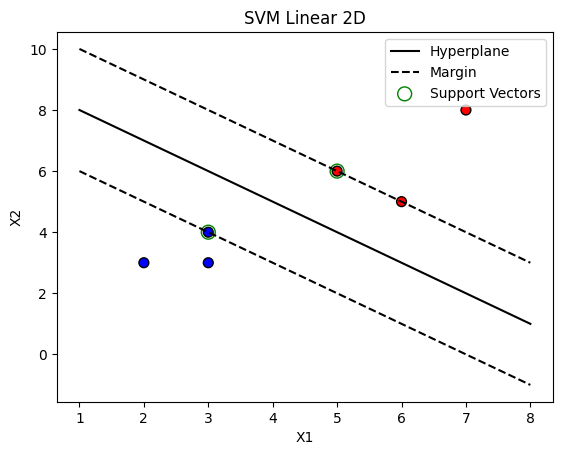

In [32]:
# Plot titik
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr, s=50, edgecolors='k')

# Plot hyperplane dan margin
plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')

# Plot support vectors
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100,
            facecolors='none', edgecolors='green', label='Support Vectors')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Linear 2D')
plt.legend()
plt.show()

## 3. Model Non-linier SVM

In [38]:
# Buat dataset 2D yang non-linear
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

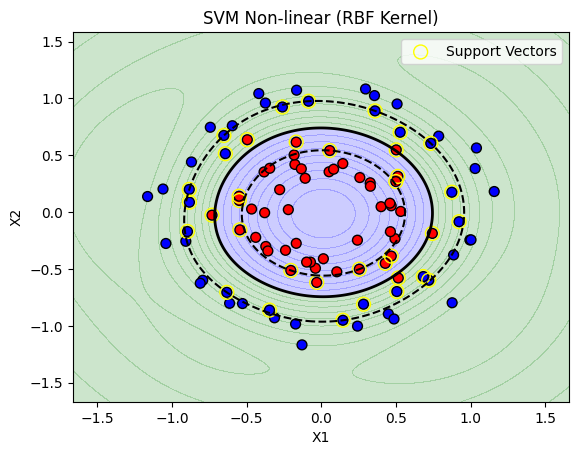

In [48]:
# Buat model SVM dengan RBF kernel
clf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X, y)

# Buat grid untuk memvisualisasikan decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary dan margin
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 10), colors='green', alpha=0.2)
plt.contourf(xx, yy, Z, levels=np.linspace(0, Z.max(), 10), colors='blue', alpha=0.2)
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)      # hyperplane
plt.contour(xx, yy, Z, levels=[-1,1], colors='k', linestyles='--') # margin

# Plot titik data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr, s=50, edgecolors='k')

# Plot support vectors
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100,
            facecolors='none', edgecolors='yellow', label='Support Vectors')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Non-linear (RBF Kernel)')
plt.legend()
plt.show()

## Tips Praktis Memilih Kernel

- Linear → kalau data bisa dipisahkan langsung, selalu mulai dari sini (simple & cepat).
- RBF → default untuk data non-linear, paling sering digunakan.
- Polynomial → kalau tahu ada hubungan kuadrat/kubik antar fitur.
- Sigmoid → jarang, eksperimental.